# Predator-Prey System (Revisited)
The [Lotka-Volterra equations](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations) is a **first-order nonlinear system of equations** used to model two species interacting. No species lives in isolation and it is common to find relationships where one species "eats" another. 


<br />

$$
\begin{align}
t &= \text{time (independent variable)} \\
x &= \text{prey population (deer)} \\
y &= \text{predator population (wolves)} \\ \\
k &= \text{prey growth rate} \\
g &= \text{predator dealth rate)} \\
b &= \text{prey-predator interaction coefficient} \\
d &= \text{prey-predator interaction coefficient} \\
\end{align}
$$

<br />

$$
\begin{align}
\frac{\partial x}{\partial t} = k \cdot x - b \cdot x \cdot y && x(0) = x_0 \\ \\
\frac{\partial y}{\partial t} = - g \cdot y + d \cdot x \cdot y && y(0) = y_0 \\
\end{align}
$$

<br />

### Interpretation
* When no wolves are present, deer exhibit malthusian growth (k)
* Wolves eat deer at a rate that is proportional (b) to the rate at which wolves and deer interact
* Without deer to eat, the wolf population declines (g)
* The rate at which wolves are born is proportional (d) to the number of deer eaten.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## Numerical Solution

In [4]:
k = 2
b = 1.2

d = 0.9
g = 1

In [5]:
def predprey(size, x_0, y_0):

    ### time domain
    t = np.linspace(0, size / 1000.0, size)
    dt = t[1] - t[0]
    
    ### initial conditions
    x = np.zeros(size)
    x[0] = x_0

    y = np.zeros(size)
    y[0] = y_0


    for n in range(0, size - 1):
        f1 = k * x[n] - b * x[n] * y[n]
    
        f2 = -g * y[n] + d * x[n] * y[n]
    
        x[n+1] = x[n] + (f1 * dt)
    
        y[n+1] = y[n] + (f2 * dt)
        
    return pd.DataFrame({'deer': x, 'wolves': y, 'time': t})

In [20]:
df = predprey(50_000, 1.0, 0.5)
# df = predprey(50_000, 1.11, 1.67)
df.head()

,deer,wolves,time
0,1.000000,0.500000,0.000
1,1.001400,0.499950,0.001
2,1.002802,0.499901,0.002
3,1.004206,0.499852,0.003
4,1.005612,0.499804,0.004


In [21]:
# pd.melt(df, id_vars=['time'], value_name='population', var_name='animal')

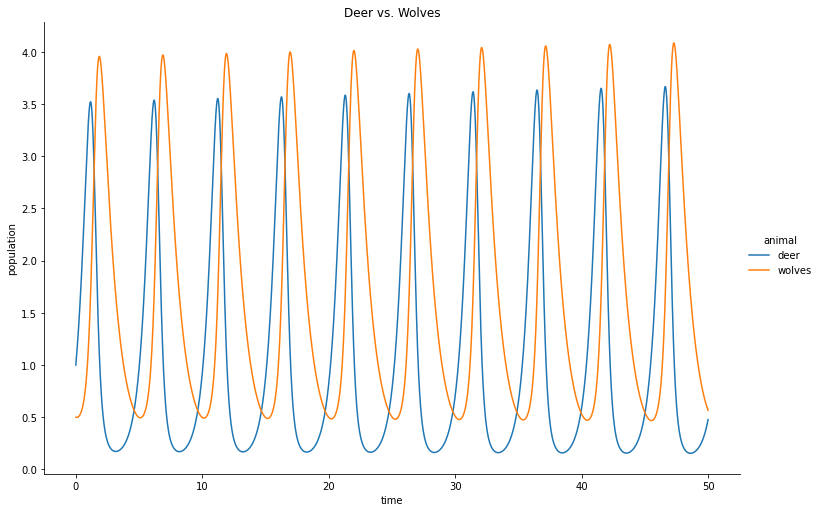

In [22]:
line = sns.relplot(
    data=pd.melt(df, id_vars=['time'], value_name='population', var_name='animal'),
    x='time',
    y='population',
    hue='animal',
    kind='line',
    height=7,
    aspect=1.5
).set(
    title="Deer vs. Wolves"
)

## Phase Portrait

In [ ]:
df = predprey(50_000, 1.0, 0.5)

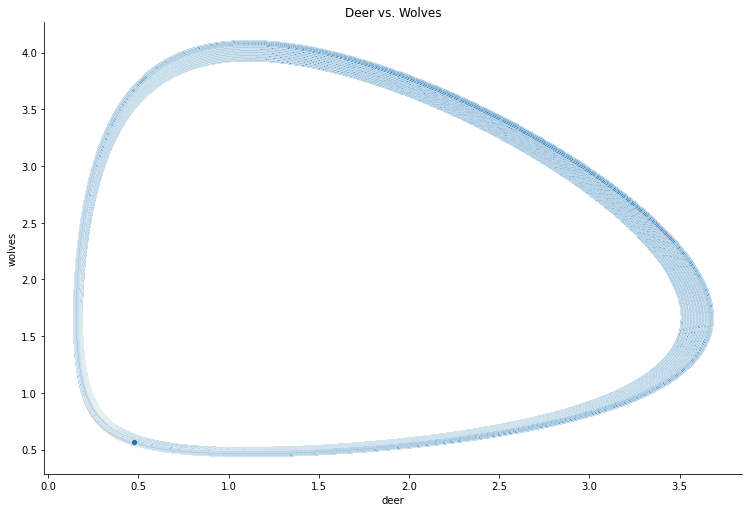

In [10]:
line = sns.relplot(
    data=df,
    x='deer',
    y='wolves',
    height=7,
    aspect=1.5
).set(
    title="Deer vs. Wolves"
)

In [11]:
dfs = []

initial_conditions = [
    (50_000, 0.8, 0.2),
    (50_000, 1.0, 0.5),
    (50_000, 1.11, 1.67)
]

for idx, ic in enumerate(initial_conditions):
    df = predprey(*ic)
    df['ic'] = idx
    dfs.append(df)
    
df = pd.concat(dfs)

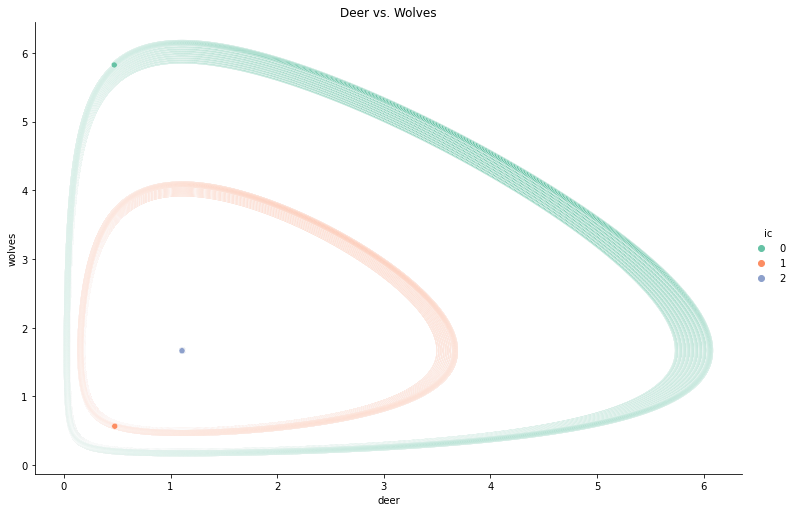

In [12]:
line = sns.relplot(
    data=df,
    x='deer',
    y='wolves',
    hue="ic",
    height=7,
    aspect=1.5,
    palette='Set2',
).set(
    title="Deer vs. Wolves"
)

# Modified Predator-Prey (w/ Logistic)
Now let's modify the predprey function to include logistic growth in the absence of predators, 

<br />
<br />

$$
\begin{align}
N &= \text{prey carrying capacity} \\
\end{align}
$$

<br />

$$
\begin{align}
\frac{\partial x}{\partial t} &= k \cdot x \cdot (1-\frac{x}{N}) - b \cdot x \cdot y && x(0) = x_0 \\ \\
\frac{\partial y}{\partial t} &= - g \cdot y + d \cdot x \cdot y && y(0) = y_0 \\
\end{align}
$$

<br />

In [17]:
def predprey_logistic(size, x_0, y_0, carrying_capacity):

    ### time domain definition
    t = np.linspace(0, size / 1000.0, size)
    dt = t[1] - t[0]
    
    ### initial conditions
    x = np.zeros(size)
    x[0] = x_0

    y = np.zeros(size)
    y[0] = y_0

    # loop for every step
    for n in range(0, size - 1):
        f1 = k * x[n] * (1-(x[n]/carrying_capacity)) - b * x[n] * y[n]
    
        f2 = -g * y[n] + d * x[n] * y[n]
    
        ### forward euler
        x[n+1] = x[n] + (f1 * dt)
    
        y[n+1] = y[n] + (f2 * dt)
        
    return pd.DataFrame({'deer': x, 'wolves': y, 'time': t})

In [25]:
N = 20
df = predprey_logistic(50_000, 1.0, 0.5, N)

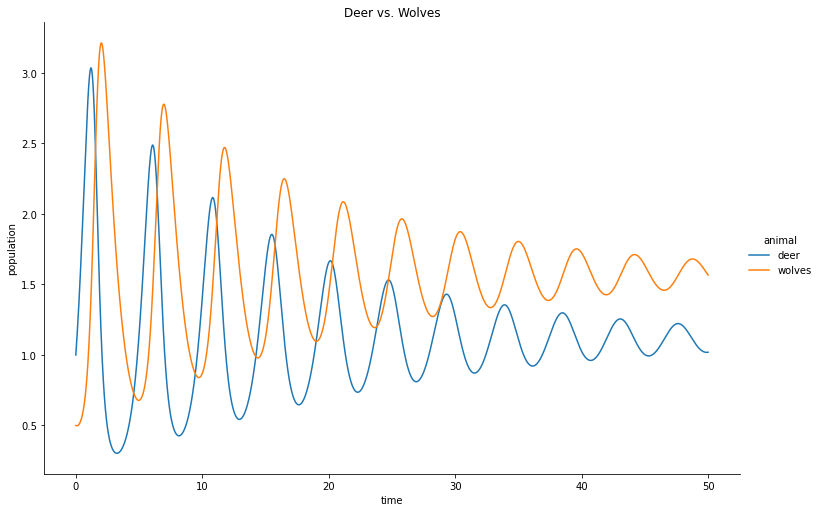

In [26]:
line = sns.relplot(
    data=pd.melt(df, id_vars=['time'], value_name='population', var_name='animal'),
    x='time',
    y='population',
    hue='animal',
    kind='line',
    height=7,
    aspect=1.5
).set(
    title="Deer vs. Wolves"
)

## Phase Portrait

In [29]:
dfs = []

initial_conditions = [
    (50_000, 1.9, 0.5, 2),
    (50_000, 1.0, 1.5, 2),
    (50_000, 1.11, 0.74, 2)
]

for idx, ic in enumerate(initial_conditions):
    df = predprey_logistic(*ic)
    df['ic'] = idx
    dfs.append(df)
    
df = pd.concat(dfs)

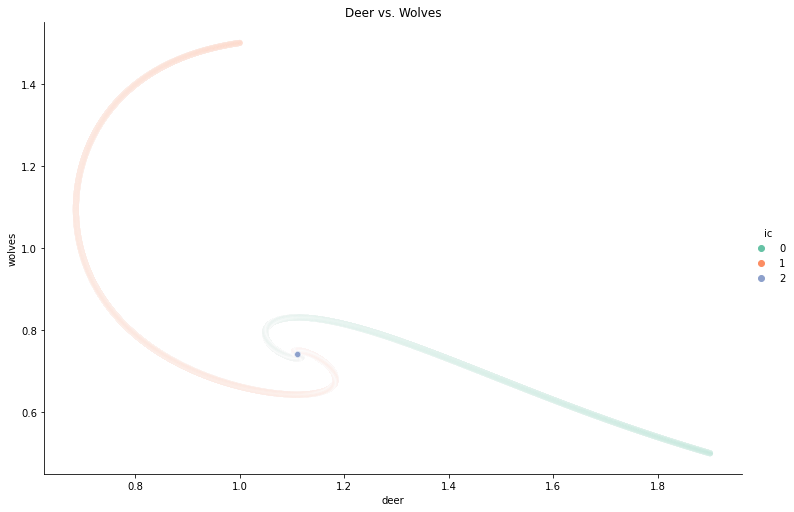

In [30]:
line = sns.relplot(
    data=df,
    x='deer',
    y='wolves',
    hue="ic",
    height=7,
    aspect=1.5,
    palette='Set2',
).set(
    title="Deer vs. Wolves"
)

# Modified Predator-Prey (w/ Hunting)
Now let's modify the predprey function to include hunting, 

<br />
<br />

$$
\begin{align}
c &= \text{prey hunting coefficient} \\
\end{align}
$$

<br />

$$
\begin{align}
\frac{\partial x}{\partial t} &= k \cdot x - b \cdot x \cdot y  - c \cdot H(t) && x(0) = x_0 \\ \\
\frac{\partial y}{\partial t} &= - g \cdot y + d \cdot x \cdot y && y(0) = y_0 \\
\end{align}
$$

<br />

In [31]:
c = 0.031

In [32]:
def predprey_hunting(size, x_0, y_0, hunting_func):

    t = np.linspace(0, size / 1000.0, size)

    dt = t[1] - t[0]
    
    x = np.zeros(size)
    x[0] = x_0

    y = np.zeros(size)
    y[0] = y_0

    for n in range(0, size - 1):
        f1 = k * x[n] - b * x[n] * y[n] - c * hunting_func[n]
    
        f2 = -g * y[n] + d * x[n] * y[n]
    
        x[n+1] = x[n] + (f1 * dt)
    
        y[n+1] = y[n] + (f2 * dt)
        
    return pd.DataFrame({'deer': x, 'wolves': y, 'time': t})

In [33]:
t = np.linspace(0, 50_000 / 1000.0, 50_000)
h = np.sin(t)
    
h

array([ 0.        ,  0.00100002,  0.00200004, ..., -0.2643043 ,
       -0.26333971, -0.26237485])

In [34]:
df = predprey_hunting(50_000, 1.9, 0.5, h)

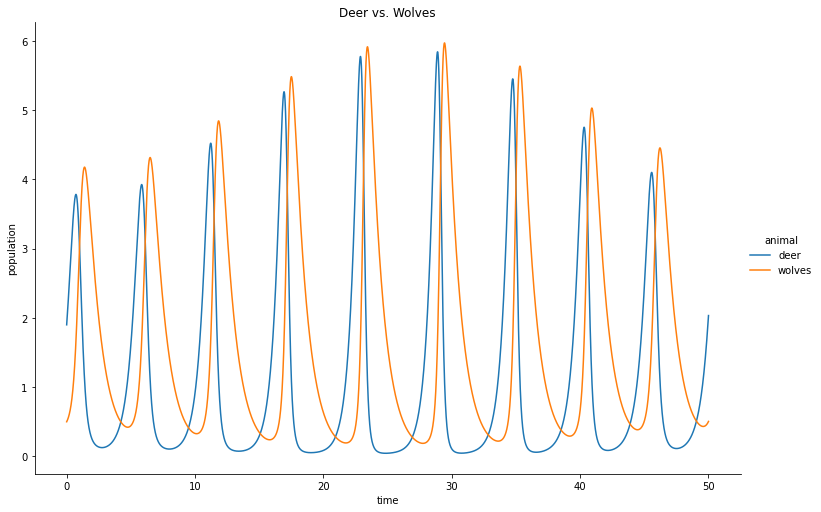

In [35]:
line = sns.relplot(
    data=pd.melt(df, id_vars=['time'], value_name='population', var_name='animal'),
    x='time',
    y='population',
    hue='animal',
    kind='line',
    height=7,
    aspect=1.5
).set(
    title="Deer vs. Wolves"
)